# Existing solution

Source: https://codegolf.stackexchange.com/questions/50299/draw-an-image-as-a-voronoi-map

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from skimage import io, transform

Run fuzzy k-means algorithm to create detalized mesh:

In [ ]:
%load voronoi_fuzzy_k_means.py

In [24]:
plt.rcParams["figure.figsize"] = (15, 15)

In [36]:
def voronoi_plot(filename, fill_polygons=True):
    points = []
    colors = []

    with open(filename, "r") as f:
        for line in f:
            l = line.strip().split()
            points.append((float(l[0]), float(l[1])))
            r = float(l[2]) if float(l[2]) < 1 else 1.0
            g = float(l[3]) if float(l[3]) < 1 else 1.0
            b = float(l[4]) if float(l[4]) < 1 else 1.0
            colors.append((r, g, b))
    
    points = np.asarray(points)

    # generate Voronoi tessellation
    vor = Voronoi(points)

    voronoi_plot_2d(vor, show_points=False, show_vertices=False, s=1)
    
    plt.gca().invert_yaxis()
    
    if fill_polygons:
        for r in range(len(vor.point_region)):
            region = vor.regions[vor.point_region[r]]
            if not -1 in region:
                polygon = [vor.vertices[i] for i in region]
                plt.fill(*zip(*polygon), color=colors[r])

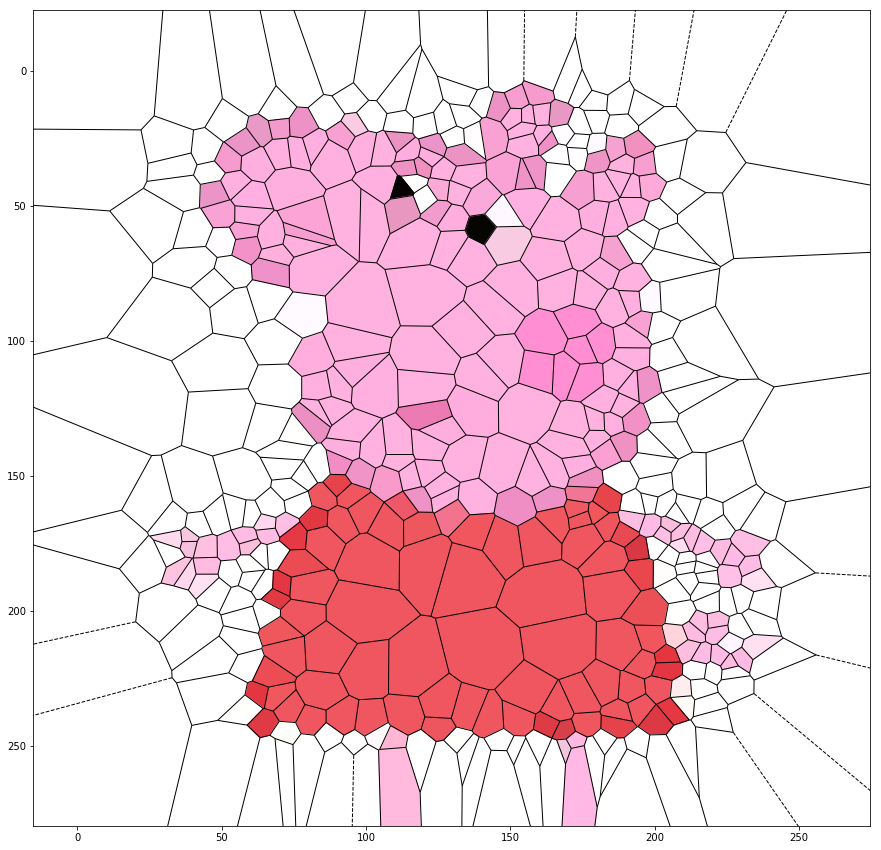

In [39]:
voronoi_plot("../img/proc/peppa_500.txt", fill_polygons=True)
plt.show()

But we want to aproximate contours with less number of points. Fuzzy k-means fails in such case

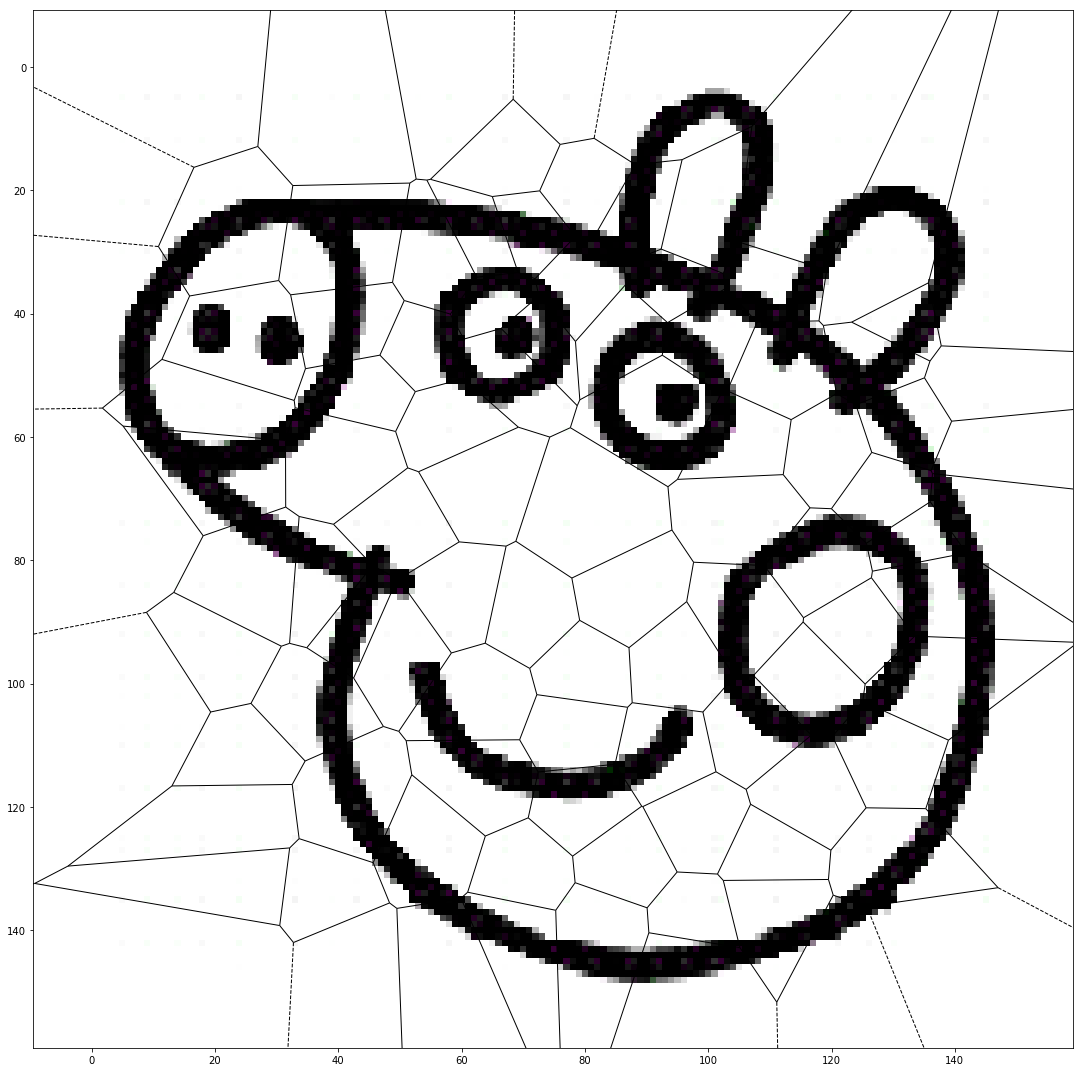

In [43]:
voronoi_plot("../img/proc/peppa_cont_100.txt", fill_polygons=False)
peppa = io.imread("../img/cont/peppa.png")
io.imshow(peppa)
plt.show()